HW 4 540

1. Generate random 200 MVN data, p=20. 

The covariance matrix should be positive semi- definite symmetric matrix.

(1) Calculate sample covariance matrix.

(2) Find out the first three principal components.

(3) Calcuate the proportions of the variability of data that can be explained by the first K

principal components and find the value of K that it reaches to 99% of the variability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *
from numpy import *
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline
np.random.seed(42)

In [2]:
# p=20
# The Multivariate  normal distribution with p =20 mean vector is mu.
# The covariance matrix is cov.
mu = np.random.uniform(-10,10,size=20)
C = np.random.random((20,20))
cov = C @ C.T # positive semi-definite

In [3]:
# pd.DataFrame(mu)

In [4]:
# pd.DataFrame(cov)

In [5]:
Ns = 200 #Generate 100 samples from x1-x20
data = np.random.multivariate_normal(mu, cov, size=Ns)
# x1 = data[:, 0]
# x2 = data[:, 1]
# x20 = data[:,19]

In [6]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.028285,7.044339,3.154462,1.512933,-8.328789,-7.193870,-10.987094,5.715640,-0.221718,1.399884,-10.451399,9.042669,4.859458,-6.814617,-7.373136,-6.907790,-5.728633,0.294179,-4.221158,-5.738514
1,-0.515590,11.995261,5.637429,2.997285,-6.097865,-3.984391,-5.453389,8.588510,2.821158,7.042220,-7.480549,10.297076,9.543349,-5.436854,-5.180020,-5.794551,-2.448751,1.445914,0.484887,-2.852837
2,-2.479066,10.646821,4.849100,2.124263,-9.730750,-5.869769,-7.928492,6.088278,2.867902,2.796465,-9.838546,8.643267,7.022822,-9.441560,-5.808307,-5.970584,-3.702099,-1.185063,-1.645960,-3.805320
3,-4.458434,4.703799,0.972906,-1.811516,-9.186672,-7.833511,-11.647068,6.066199,1.609970,2.336624,-13.229310,5.661379,3.785716,-9.200031,-7.838736,-7.669863,-3.852251,-1.571290,-3.070788,-4.241851
4,-3.879918,7.568512,4.935061,-0.196527,-7.957981,-8.662558,-9.007468,7.842679,2.147733,2.952664,-9.888472,9.583231,6.054640,-6.285248,-5.183192,-4.486946,-5.537024,2.671490,0.482965,-5.805538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-5.052069,9.038035,3.346808,-0.717371,-7.753912,-7.123548,-9.116612,5.761052,2.755814,6.143652,-10.175116,8.152350,6.755265,-6.245946,-9.904564,-6.712559,-1.739268,-0.148548,-1.432750,-5.658267
196,-1.675964,8.094876,3.979724,1.802608,-7.301681,-7.852068,-9.243530,6.469519,0.636586,2.935210,-9.984207,7.074040,4.271465,-6.353566,-6.162284,-8.893151,-6.450631,0.311067,-4.085456,-5.540238
197,-2.208338,10.423850,6.921444,4.393149,-1.575423,-5.436887,-7.020149,11.011035,4.099022,6.293326,-6.462365,12.138507,10.208773,-0.898877,-5.015948,-3.988276,-1.787484,4.448499,1.498928,-2.800225
198,-4.879270,4.076858,0.788565,-2.038523,-9.611597,-9.476269,-12.335391,4.822375,-3.042494,-0.669434,-13.309391,4.332799,2.985051,-8.481503,-8.619968,-7.214914,-6.484872,-0.306552,-6.218481,-8.384929


In [7]:
#normalize data
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_n = np.cov(data_scaled)
pd.DataFrame(data_n)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.082606,-0.048990,-0.013852,-0.037229,0.021112,0.000595,-0.081955,0.064160,0.009096,-0.022276,...,0.013823,-0.007149,-0.017635,-0.037575,0.012331,-0.097967,0.015416,0.015411,0.063973,0.033248
1,-0.048990,0.160724,0.118058,-0.001054,-0.079239,-0.097917,0.079266,-0.162508,0.089662,0.003174,...,0.017299,0.071120,-0.019405,0.050458,0.021612,0.080659,0.022276,-0.098906,-0.050253,-0.085412
2,-0.013852,0.118058,0.369107,0.094110,-0.036692,0.129880,0.034417,0.104631,0.006580,-0.014986,...,0.024325,0.059577,-0.009288,-0.147522,0.087493,0.006819,-0.025484,-0.289246,-0.049249,-0.010721
3,-0.037229,-0.001054,0.094110,0.351161,0.030456,0.097513,0.111967,0.164433,-0.017410,-0.032384,...,-0.008997,-0.005935,0.023760,-0.278905,-0.115362,0.111310,-0.079303,-0.098089,0.083078,0.005828
4,0.021112,-0.079239,-0.036692,0.030456,0.306720,0.070408,0.027699,0.241104,-0.052034,-0.054697,...,0.035943,-0.063325,-0.064059,-0.193865,-0.117867,-0.040761,-0.030672,0.055899,0.130567,0.007109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.097967,0.080659,0.006819,0.111310,-0.040761,-0.047120,0.114619,-0.063207,-0.039713,0.019332,...,0.040713,0.023949,0.103478,0.011437,0.014634,0.381610,-0.158130,0.029714,-0.064890,-0.131697
196,0.015416,0.022276,-0.025484,-0.079303,-0.030672,-0.112005,-0.026772,-0.099770,0.080158,0.023913,...,-0.059856,0.010974,-0.037099,0.049198,0.022014,-0.158130,0.167572,-0.015402,0.010793,0.039753
197,0.015411,-0.098906,-0.289246,-0.098089,0.055899,-0.100904,0.002309,-0.018632,-0.060344,-0.001714,...,-0.015826,-0.066467,0.047129,0.124498,-0.073098,0.029714,-0.015402,0.308246,0.054544,0.002355
198,0.063973,-0.050253,-0.049249,0.083078,0.130567,-0.011725,0.014392,0.110553,0.045047,-0.043535,...,-0.008017,-0.004730,-0.074218,-0.109841,-0.100037,-0.064890,0.010793,0.054544,0.232128,-0.033137


In [8]:
plt.rcParams['figure.figsize']=(10,10)
plt.matshow()
plt.show()

TypeError: matshow() missing 1 required positional argument: 'A'

In [ ]:
pca=PCA(n_components='mle')
pca.fit()
data_pca = pca.transform(data_n)
# pd.DataFrame(pca_cov)

In [ ]:
plt.plot(pca.explained_variance_ratio_)

NameError: name 'pca_cov' is not defined

<Figure size 720x720 with 0 Axes>

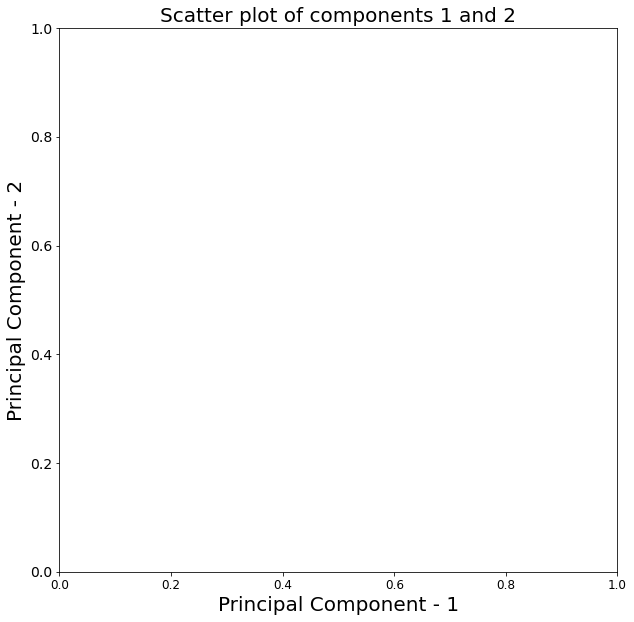

In [9]:
# ??

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Scatter plot of components 1 and 2",fontsize=20)
plt.scatter(pca_cov[:, 0],pca_cov[:, 1], cmap=plt.cm.Set1, edgecolor='k', s=40)

# 用上次那个三一图

plt.legend()

2. Generate $Y$ values using the following regression functions: 

$Y=5+2 X_{1}+5 X_{3}+$ $3 X_{19}+\epsilon$ 
for the generated X matrix in #1

 (1) Estimate the regression line using the least square method and find out the predicted values, residuals for each observation and the mean square errors.

(2) Estimate the regression line using the least square method based on the first 5 principal components and find out the predicted values, residuals for each observation and the mean square errors.

(3) Compare the results in (1) and (2).